<a href="https://colab.research.google.com/github/seph0916/seph-solo-machine/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A07%EB%8B%A8%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공 신경망 ANN

In [ ]:
# 패션 MNIST 데이터셋 사용 : 10종류의 패션아이템 불러오기
from tensorflow import keras
(train_input,train_target),(test_input,test_target)= \
keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# 데이터의 크기 확인
print(train_input.shape,train_target.shape)
print(test_input.shape,test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


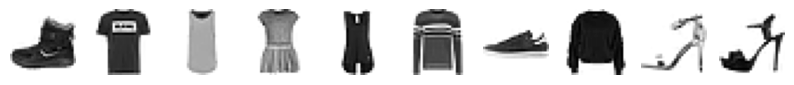

In [ ]:
# 6장에서 배운것처럼 훈련데이터의 샘플을 그림으로 출력
import matplotlib.pyplot as plt
fig,axs=plt.subplots(1,10,figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i],cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [ ]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
# 10개의 타깃에 대한 샘플 갯수 np.unique 함수 사용
import numpy as np
print(np.unique(train_target,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [ ]:
# 60000개의 샘플을 다 사용하는것 보다 샘플을 하나씩 꺼내 훈련해보는게 좋아보임. SGDClassifier 사용
# 패션 MNIST의 경우 0~255 사이의 정숫값 가짐. 따라서 255로 나누어 0~1사이의 값으로 정규화.
# 양숫값으로 이루어진 이미지를 전처리할때 널리 사용하기위해.
train_scaled=train_input/255.0
train_scaled=train_scaled.reshape(-1,28*28)

In [ ]:
print(train_scaled.shape)

(60000, 784)


In [ ]:
# SGDClassifier 과 cross_validate 함수 사용.
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc=SGDClassifier(loss='log',max_iter=5,random_state=42)
scores=cross_validate(sc,train_scaled,train_target,n_jobs=-1)
print(np.mean(scores['test_score']))

0.8196000000000001


In [ ]:
# 인공 신경망 관련 이야기..
# 티셔츠, 바지 와 같은(z1,z2,''',z10) 출력값을 의미하는 바로 최종 값을 만드는 층 -> 출력층
# z1,z2,''',z10 과 같이 z 값을 계산하는 단위 -> 뉴런 또는 유닛
# 픽셀1, 픽셀2를 x1 ,x2 라하여 이러한 층 -> 입력층

In [ ]:
# 코랩에서의 텐서플로우 임포트
# keras -> 고수준 API
# GPU를 사용하면 텐서플로우로 만든 딥러닝 모델을 빠르게 훈련 시킬수있다.
import tensorflow as tf
from tensorflow import keras

In [ ]:
# 인공 신경망으로 모델 만들기.
# 인공 신경망에서 교차 검증을 잘 사용하지 않고 검증세트를 별도로 사용함.
# 그이유 -> 딥러닝 분야의 데이터셋 충분히 크고, 검증점수 안정적이며 교차 검증을 수행하기에는 훈련 시간이 너무 오래걸림.

In [ ]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target,val_target=train_test_split(train_scaled,
                                                                   train_target,test_size=0.2,random_state=42)


In [ ]:
print(train_scaled.shape,train_target.shape)

(48000, 784) (48000,)


In [ ]:
print(train_scaled.shape,train_target.shape)

(48000, 784) (48000,)


In [ ]:
# 레이어 패키지 안에 있는 다양한 층중 가장 기본인 밀집층 -> 많은 갯수의 픽셀과 출력층의 연결선이 매우 빽빽해서 밀집층
# 이런 층을 양쪽 뉴런이 모두 연결하기 있으므로 완전 연결층이라고 부르기도 함.
# Dense 클래스를 이용해 밀집층 만들기.
dense=keras.layers.Dense(10,activation='softmax',input_shape=(784,))

In [ ]:
# 밀집층을 가진 신경망 모델 만들기.
model=keras.Sequential(dense)

In [ ]:
# 인공 신경망으로 패션 아이템 분류하기
# keras 모델을 만드는 방식이 사이킷런과 다름.
# loss ->손실함수는 두가지가 있다. 이진 분류 binary_crossentropy
# 다중 분류 categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')

In [ ]:
# 타깃값을 해당클라스만 1이고 나머지를 다 0으로 만드는 것을 원-핫 인코딩이라고 함.
# 따라서 다중 분류에서 크로스 엔트로피 손실함수를 사용하려면 0,1,2와같은 정수로된 타깃을 원-핫 인코딩으로 변환해야함.
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [ ]:
# 정수로된 타깃값을 원-핫 인코딩으로 바꾸지 않고 사용할수 있다. 그게 바로 sparse_categorical_crossentropy.
# complie 메소드의 두번째 매개변수 metrics -> 케라스는 모델이 훈련할때 기본적으로 에포크마다 손실값을 출력함 그때
# 손실값이 줄어드는것을 보면 훈련이 잘되었다는 알수 있지만 정확도도 함께 출력 시키기 위해 씀.
model.fit(train_scaled,train_target,epochs=50)

Epoch 1/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6105 - accuracy: 0.7923
Epoch 2/50
1500/1500 [==============================] - 2s 999us/step - loss: 0.4747 - accuracy: 0.8396
Epoch 3/50
1500/1500 [==============================] - 1s 994us/step - loss: 0.4499 - accuracy: 0.8479
Epoch 4/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4369 - accuracy: 0.8515
Epoch 5/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4299 - accuracy: 0.8548
Epoch 6/50
1500/1500 [==============================] - 1s 996us/step - loss: 0.4234 - accuracy: 0.8563
Epoch 7/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4191 - accuracy: 0.8579
Epoch 8/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4156 - accuracy: 0.8602
Epoch 9/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4127 - accuracy: 0.8604
Epoch 10/50
1500/1500 [==============================] - 3s 2ms/step - loss:

In [ ]:
# 모델을 훈련 시킨 이후 모델의 성능을 평가하는 evluate method
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 0s 836us/step - loss: 0.4559 - accuracy: 0.8531


[0.45589229464530945, 0.8530833125114441]

# 심층 신경망 DNN

In [ ]:
# 인공 신경망의 성능을 더 높여보자.
from tensorflow import keras
(train_input,train_target),(test_input,test_target)=\
keras.datasets.fashion_mnist.load_data()

In [ ]:
# 픽셀값의 범위 0~255를 0~1사이로 변환하고, 28*28 크기의 2차원 배열을 784 크기 1차원 배열로 .
# 이후 훈련세트와 검증세트로 나누기.
from sklearn.model_selection import train_test_split
train_scaled=train_input/255.0
train_scaled=train_scaled.reshape(-1,28*28)
train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

In [ ]:
# 인공 신경망 모델 층 2개 추가.
# 입력층과 출력층 사이 밀집층 추가 -> 입력층과 출력층 사이에 있는 층을 은닉층이라고 함.
# 은닉층에 활성화함수를 적용하는 이유 : 첫번째 식에서 계산된 b가 두번째 식에서 c를 계산하기 위해서 쓰임.
# 하지만 첫번째 식의 a를가지고 b를통해 c 표현 가능.
# 신경망도 이와 같다. 은닉층에서 선형적인 산술 계산만 수행한다면 역활이 없는셈이다.
# 선형 계산을 적당하게 비선형적으로 비틀어 주어야함.

In [ ]:
# 시그모이드 활성화 함수를 사용한 은닉층과 소프트맥스 함수를 사용한 출력층을 케라스 decse클래스로 만들어보기.
dense1=keras.layers.Dense(100,activation='sigmoid',input_shape=(784,))
dense2=keras.layers.Dense(10,activation='softmax')

In [ ]:
# dense1 , dense2 객체를 sequential 클래스에 추가해 심층 신경망을 만들어 보기
# 이게 인공신경망의 강력 성능 -> 층을 추가해 입력데이터에 대해 연속적인 학습을 함.
model=keras.Sequential([dense1,dense2])

In [ ]:
# 첫줄: 모델 이름
# 그다음줄 부터 : 층의 이름 , 클래스 , 출력크기, 모델 파라미터 개수
# 784개의 입력층 뉴런에 100개의 은닉층 뉴런.
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 층을 추가하는 다른방법.
# sequemtial 클래스의 생성자 안에 바로 dense 클래스의 객체를 만들기.
model=keras.Sequential([keras.layers.Dense(100,activation='sigmoid',input_shape=(784,),
                                           name='hidden'),
                        keras.layers.Dense(10,activation='softmax',name='output')],name='패션 MNIST모델')

In [ ]:
model.summary()

Model: "패션 MNIST모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [51]:
# 많은 층을 사용할때에 세퀀셜  클래스 생성자가 길어지기 때문에
# add method 를 사용해 보자.
model=keras.Sequential()
model.add(keras.layers.Dense(100,activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10,activation='softmax'))

In [52]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5727 - accuracy: 0.8050
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4121 - accuracy: 0.8525
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3772 - accuracy: 0.8648
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3536 - accuracy: 0.8720
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3364 - accuracy: 0.8776


In [54]:
# 렐루 함수 max(0,x)
# 기존에 사용하던 시그모이드 함수의 단점 -> 함수의 오른쪽과 왼쪽 끝으로 갈수록 그래프가 누워있기때문에 올바른 출력을 만드는데 신속하게 대응하지 못함.
# Flatten 클래스 배치차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼침.
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [55]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 100)               78500     
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [59]:
# reshape 함수를 사용하지 않음.
(train_input,train_target),(test_input,test_target)=\
keras.datasets.fashion_mnist.load_data()
train_scaled=train_input/255.0
train_scaled,val_scaled,train_target,val_target=train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42)

In [58]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5307 - accuracy: 0.8124
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3917 - accuracy: 0.8593
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3559 - accuracy: 0.8731
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3345 - accuracy: 0.8799
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3204 - accuracy: 0.8855


In [60]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.3587 - accuracy: 0.8762


[0.358661413192749, 0.8761666417121887]

In [63]:
# 옵티마이저
# keras는 기본적으로 미니 배치 경사 하강법을 사용하며 미니배치 개수는 32개임.
# fit method에 batch_size는 이를 조정할수있다.
# complie method에 기본 경사하강법 알고리즘인 RMSprop을 사용함.
# 'sgd' 와 sgd 차이 -> sgd라고 설저하는것은 클래스객체를 만들고 사용하는것이나, 'sgd'로 지정을 해주면 자동으로 클래스 객체 만들어줌
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [64]:
sgd=keras.optimizers.SGD()
model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics='accuracy')

In [65]:
sgd=keras.optimizers.SGD(learning_rate=0.1)

In [66]:
# 네스테로프 모멘텀 최적화 -> 모멘텀 최적화를 2번 반복하여 구현 기본 확률적 경사 하강법 보다 나은 성능을 제공
# 모델이 최적점에 갈수록 학습률을 낮춤. -> 최적점 수렴할 가능성이 높다.
# 이런 학습률을 적응적 학습률 이라고함.
# adagrad, rmsprop 가 대표적 옵티마이저.
# RMSprop의 장점을 접목한 Adam 클래스로 패션 모델 훈련.
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [68]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5256 - accuracy: 0.8142
Epoch 2/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3930 - accuracy: 0.8580
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3495 - accuracy: 0.8736
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3221 - accuracy: 0.8826
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3047 - accuracy: 0.8879


In [69]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3370 - accuracy: 0.8810


[0.3370240330696106, 0.8809999823570251]